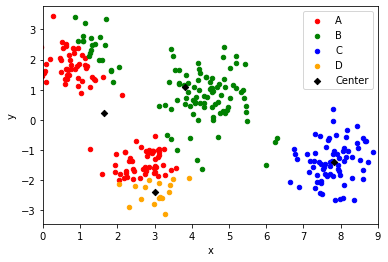

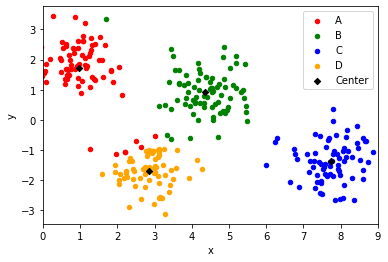

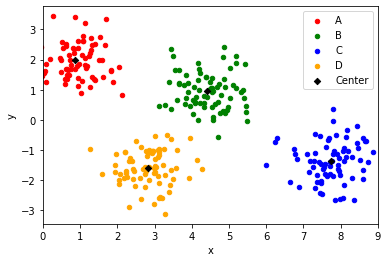

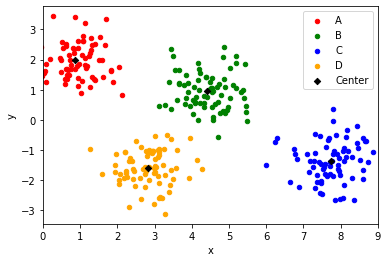

In [276]:
import numpy as np
import pandas as pd
DataSet = pd.read_csv('cdata.csv')
k=4
Data_K = DataSet.sample(n=k,axis=0).drop(columns = ['cluster']).values#隨機選K個點作為起始中心點
Data_Test = DataSet.drop(columns=['cluster']).values#提取各點x y資料
Difference = float('inf')
while (Difference!=0):#重複做直到分群變動小於兩個點
    for i in range(0,k):#記錄每一點和核心k的距離
        Distance = np.sqrt(np.sum(np.square(Data_Test-Data_K[i]),axis=1))#計算每個點與各中心點的歐式距離
        DataSet[i] = Distance#存取每個點與各中心點的距離
    DataDistance = np.array(DataSet.loc[:,[0,1,2,3]])#提取每個點與各中心點的距離
    DataSet['NewCluster'] = np.argmin(DataDistance,axis=1)#選出每個點是屬於哪一個cluster的
    DataCenter = DataSet.groupby('NewCluster').mean()#選出新的中心點
    #畫出散佈圖
    Iteration=DataSet.groupby('NewCluster').get_group(0).plot(
                 kind = 'scatter',
                 xlim = 0,
                 xticks=range(0,10),
                 x='x',
                 y='y',
                 color='r',
                 label='A')
    DataSet.groupby('NewCluster').get_group(1).plot(
                 kind = 'scatter',
                 xlim = 0,
                 xticks=range(0,10),
                 x='x',
                 y='y',
                 color='g',
                 ax=Iteration,                                   
                 label='B' )
    DataSet.groupby('NewCluster').get_group(2).plot(
                 kind = 'scatter',
                 xlim = 0,
                 xticks=range(0,10),
                 x='x',
                 y='y',
                 color='b',
                 ax=Iteration,
                 label='C' )
    DataSet.groupby('NewCluster').get_group(3).plot(
                 kind = 'scatter',
                 xlim = 0,
                 xticks=range(0,10),
                 x='x',
                 y='y',
                 color='orange',                                      
                 ax=Iteration,
                 label='D' )
    DataCenter.plot(
                 kind = 'scatter',
                 xlim = 0,
                 xticks = range(0,10),
                 x='x',
                 y='y',
                 color = 'black',
                 marker='D',
                 ax=Iteration,
                 label='Center')
    Data_K = DataCenter.loc[:,['x','y']].values#提取中心點資料
    Data_Test = DataSet.loc[:,['x','y']].values#提取欲分群之資料
    Difference = DataSet.loc[:,['cluster','NewCluster']]#提取各點新舊分群
    Difference = Difference[Difference['cluster'] !=Difference['NewCluster']]['cluster'].count()#計算有更新分群的點的數量
    DataSet['cluster'] = DataSet['NewCluster']#更新分群資料
#DataSet

<AxesSubplot:xlabel='Number of K', ylabel='Sum of square error'>

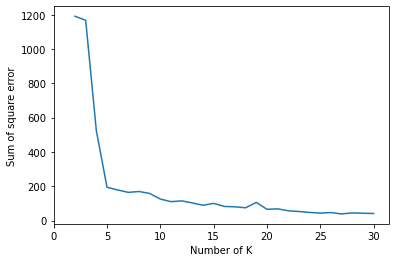

In [296]:
DataSet = pd.read_csv('cdata.csv')
k=30
K_Iteration = np.zeros((2,k-1))#建立紀錄
for i in range(2,k+1):#i是中心點個數
    Difference = float('inf')
    K_Iteration[0][i-2] = i#紀錄幾個K
    Data_K = DataSet.sample(n=i,axis=0).drop(columns = ['cluster']).values#隨機選K個點作為起始中心點
    Data_Test = DataSet.drop(columns=['cluster']).values#提取各點x y資料
    while (Difference!=0):#重複做直到分群變動小於一個點
        for j in range(0,i):#記錄每一點和核心k的距離
            Distance = np.sqrt(np.sum(np.square(Data_Test-Data_K[j]),axis=1))#計算每個點與各中心點的歐式距離
            DataSet[j] = Distance#存取每個點與各中心點的距離
        K_Array = np.arange(0,i,1)#生成紀錄K數量之array
        DataDistance = np.array(DataSet.loc[:,K_Array])#提取每個點與各中心點的距離
        DataSet['NewCluster'] = np.argmin(DataDistance,axis=1)#選出每個點是屬於哪一個cluster的
        DataCenter = DataSet.groupby('NewCluster').mean()#選出新的中心點
        Data_K = DataCenter.loc[:,['x','y']].values#提取中心點資料
        Data_Test = DataSet.loc[:,['x','y']].values#提取欲分群之資料
        Difference = DataSet.loc[:,['cluster','NewCluster']]#提取各點新舊分群
        Difference = Difference[Difference['cluster'] !=Difference['NewCluster']]['cluster'].count()#計算有更新分群的點的數量
        DataSet['cluster'] = DataSet['NewCluster']#更新分群資料
    DataSet['MinDistance'] = np.min(DataDistance,axis=1)#紀錄與最近中心點之距離
    SSE = DataSet.groupby('NewCluster').apply(lambda x:x*x)['MinDistance'].sum()#計算SSE     
    #print(SSE)
    K_Iteration[1][i-2] = SSE#紀錄該次的SSE
K_Iteration = pd.DataFrame(K_Iteration,index=['x','y']).T
K_Iteration.plot(
                kind = 'line',
                legend=False,
                x='x',
                y='y',
                xlim = 0,
                xlabel = 'Number of K',
                ylabel = 'Sum of square error'
                )

<AxesSubplot:title={'center':'Result of ten times randomly pick the initial points'}, xlabel='Fixed K = 10', ylabel='Sum of square error'>

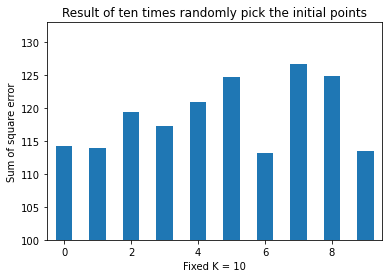

In [323]:
DataSet = pd.read_csv('cdata.csv')
k=10
K_Iteration = np.zeros((2,k))#建立紀錄
for i in range(0,10):#i是執行次數
    Difference = float('inf')
    K_Iteration[0][i] = i+1#紀錄幾個K
    Data_K = DataSet.sample(n=k,axis=0).drop(columns = ['cluster']).values#隨機選K個點作為起始中心點
    Data_Test = DataSet.drop(columns=['cluster']).values#提取各點x y資料
    while (Difference!=0):#重複做直到分群變動小於一個點
        for j in range(0,k):#記錄每一點和核心k的距離
            Distance = np.sqrt(np.sum(np.square(Data_Test-Data_K[j]),axis=1))#計算每個點與各中心點的歐式距離
            DataSet[j] = Distance#存取每個點與各中心點的距離
        K_Array = np.arange(0,k,1)#生成紀錄K數量之array
        DataDistance = np.array(DataSet.loc[:,K_Array])#提取每個點與各中心點的距離
        DataSet['NewCluster'] = np.argmin(DataDistance,axis=1)#選出每個點是屬於哪一個cluster的
        DataCenter = DataSet.groupby('NewCluster').mean()#選出新的中心點
        Data_K = DataCenter.loc[:,['x','y']].values#提取中心點資料
        Data_Test = DataSet.loc[:,['x','y']].values#提取欲分群之資料
        Difference = DataSet.loc[:,['cluster','NewCluster']]#提取各點新舊分群
        Difference = Difference[Difference['cluster'] !=Difference['NewCluster']]['cluster'].count()#計算有更新分群的點的數量
        DataSet['cluster'] = DataSet['NewCluster']#更新分群資料
    DataSet['MinDistance'] = np.min(DataDistance,axis=1)#紀錄與最近中心點之距離
    SSE = DataSet.groupby('NewCluster').apply(lambda x:x*x)['MinDistance'].sum()#計算SSE
    #print(SSE)
    K_Iteration[1][i] = SSE#紀錄該次的SSE
K_Iteration = pd.DataFrame(K_Iteration,index=['x','y']).T
K_Iteration.plot(
                kind = 'bar',
                legend=False,
                title='Result of ten times randomly pick the initial points',
                x='x',
                y='y',
                rot = 0,
                xticks = range(0,10,2),
                ylim = 100,
                xlabel = 'Fixed K = 10',
                ylabel = 'Sum of square error'
                )